In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('/datasets/rest_data_us_upd.csv')

Primeiras linhas do dataset:
      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   nu

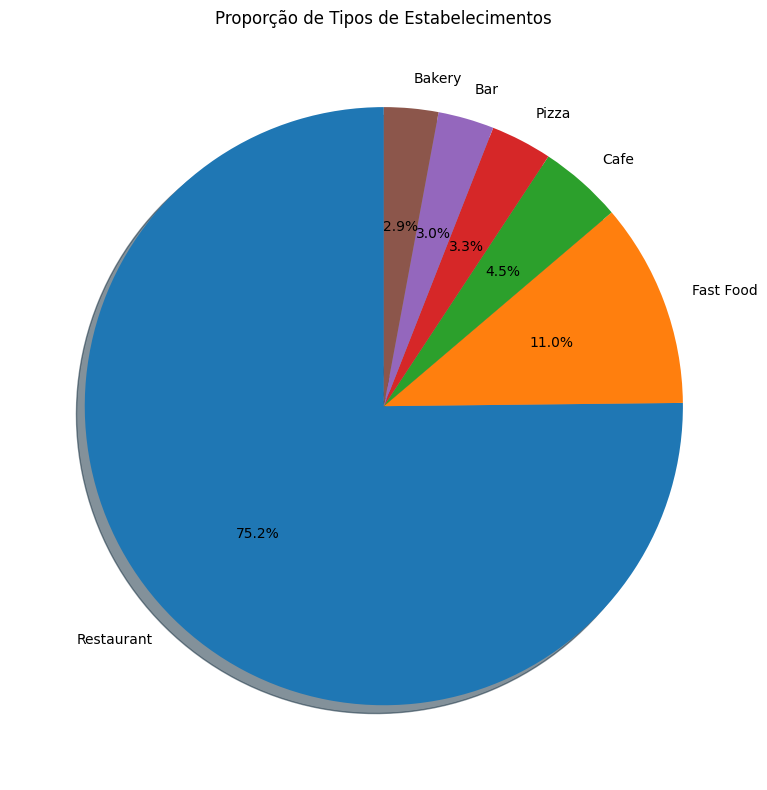

In [8]:
# Estudo inicial dos dados
print("Primeiras linhas do dataset:")
print(df.head())

print("Informações gerais sobre o dataset:")
print(df.info())

print("Contagem de valores ausentes por coluna:")
print(df.isna().sum())

# Contar proporções dos tipos de estabelecimentos
type_counts = df['object_type'].value_counts(normalize=True) * 100

# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Proporção de Tipos de Estabelecimentos')
plt.ylabel('')
plt.tight_layout()
plt.show()

False    5972
True     3676
Name: chain, dtype: int64


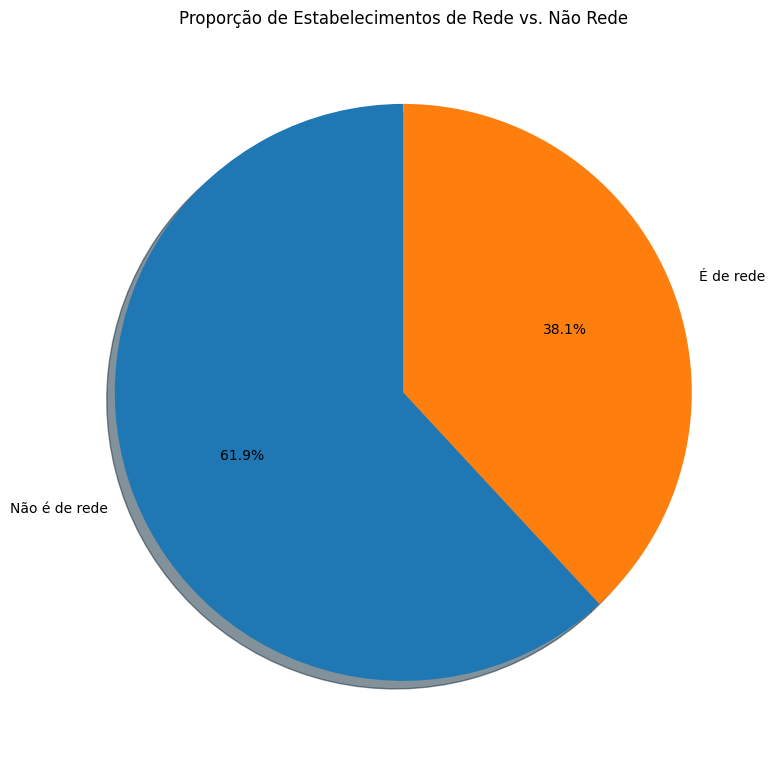

In [52]:
# Verificar valores únicos para garantir que 1 = rede, 0 = não rede
print(df['chain'].value_counts())

# Calcular proporções
chain_counts = df['chain'].value_counts(normalize=True) * 100
chain_counts.index = ['Não é de rede', 'É de rede']  # Renomear para visualização

# Gráfico de pizza
plt.figure(figsize=(8, 8))
chain_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Proporção de Estabelecimentos de Rede vs. Não Rede')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [53]:
# Converter a coluna 'chain' para numérica (força erro para valores inválidos)
df['chain'] = pd.to_numeric(df['chain'], errors='coerce')

# Calcular a proporção de estabelecimentos de rede por tipo
network_share_by_type = df.groupby('object_type')['chain'].mean().sort_values(ascending=False) * 100

# Exibir os resultados
print(network_share_by_type)

object_type
Bakery        100.000000
Cafe           61.149425
Fast Food      56.754221
Pizza          47.962382
Restaurant     31.600717
Bar            26.369863
Name: chain, dtype: float64


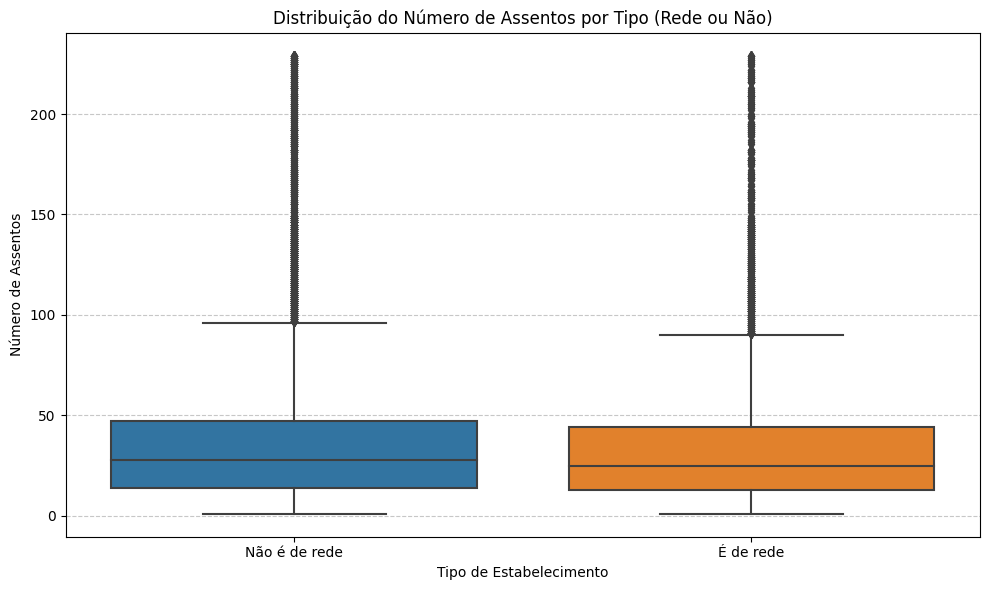

In [54]:
# Remover valores ausentes na coluna 'number'
df = df.dropna(subset=['number'])

# Garantir que 'number' também seja numérica
df['number'] = pd.to_numeric(df['number'], errors='coerce')

# Boxplot para comparar distribuições
plt.figure(figsize=(10, 6))
sns.boxplot(x='chain', y='number', data=df)
plt.xticks([0, 1], ['Não é de rede', 'É de rede'])
plt.title('Distribuição do Número de Assentos por Tipo (Rede ou Não)')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Número de Assentos')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64


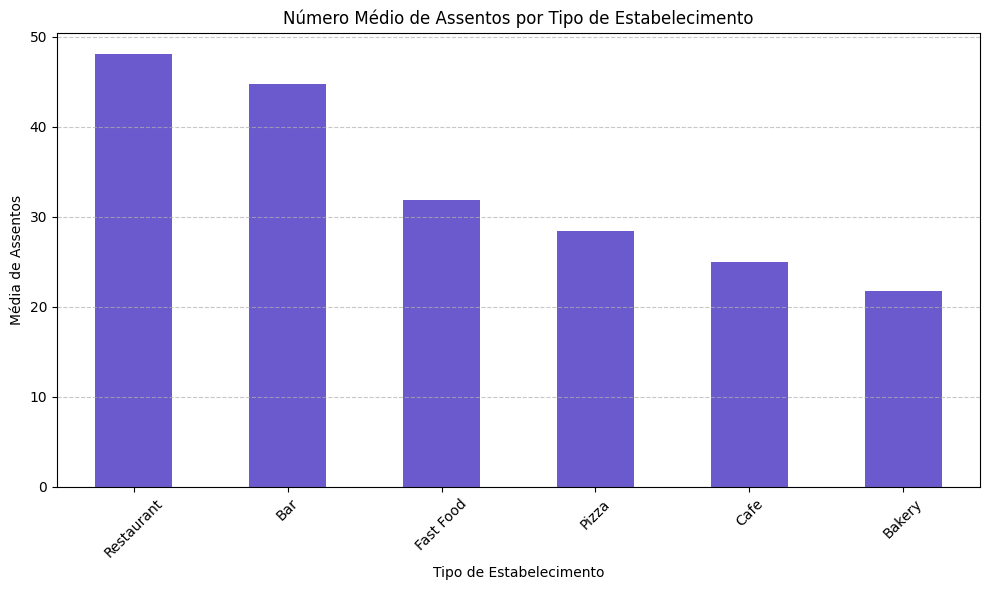

In [55]:
# Garantir que 'number' é numérico e remover valores ausentes
df['number'] = pd.to_numeric(df['number'], errors='coerce')
df = df.dropna(subset=['number'])

# Calcular número médio de assentos por tipo
avg_seats_by_type = df.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Exibir resultado
print(avg_seats_by_type)

plt.figure(figsize=(10, 6))
avg_seats_by_type.plot(kind='bar', color='slateblue')
plt.title('Número Médio de Assentos por Tipo de Estabelecimento')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Média de Assentos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [56]:
# Função para extrair o nome da rua (removendo o número e pegando o resto)
def extract_street(address):
    if pd.isnull(address):
        return None
    # Remove o número no início e pega o restante como nome da rua
    match = re.match(r'\d+\s+(.*)', address)
    return match.group(1) if match else address

# Aplicar a função para criar a nova coluna 'street'
df['street'] = df['address'].apply(extract_street)

# Verificar o resultado
print(df[['address', 'street']].head())


                   address              street
0   3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1        100 WORLD WAY 120       WORLD WAY 120
2  6801 HOLLYWOOD BLVD 253  HOLLYWOOD BLVD 253
3       1814 W SUNSET BLVD       W SUNSET BLVD
4       2100 ECHO PARK AVE       ECHO PARK AVE


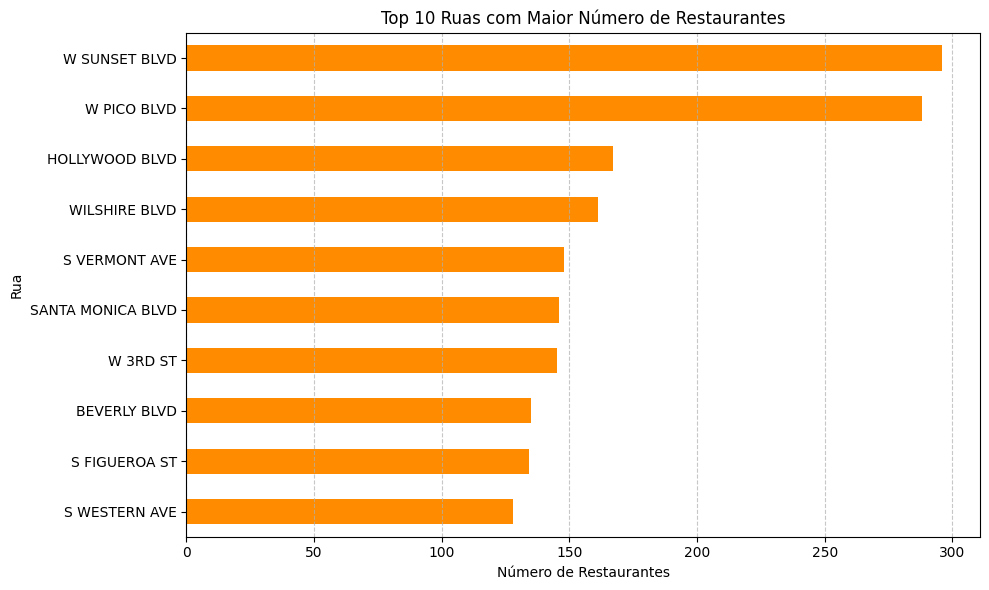

In [57]:
# Contar os restaurantes por rua
top_streets = df['street'].value_counts().head(10)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
top_streets.sort_values().plot(kind='barh', color='darkorange')
plt.title('Top 10 Ruas com Maior Número de Restaurantes')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Rua')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
# Contar ocorrências de cada rua
street_counts = df['street'].value_counts()

# Filtrar ruas com apenas 1 restaurante
single_restaurant_streets = street_counts[street_counts == 1]

# Resultado
print("Número de ruas com apenas um restaurante: {len(single_restaurant_streets)}")

Número de ruas com apenas um restaurante: {len(single_restaurant_streets)}


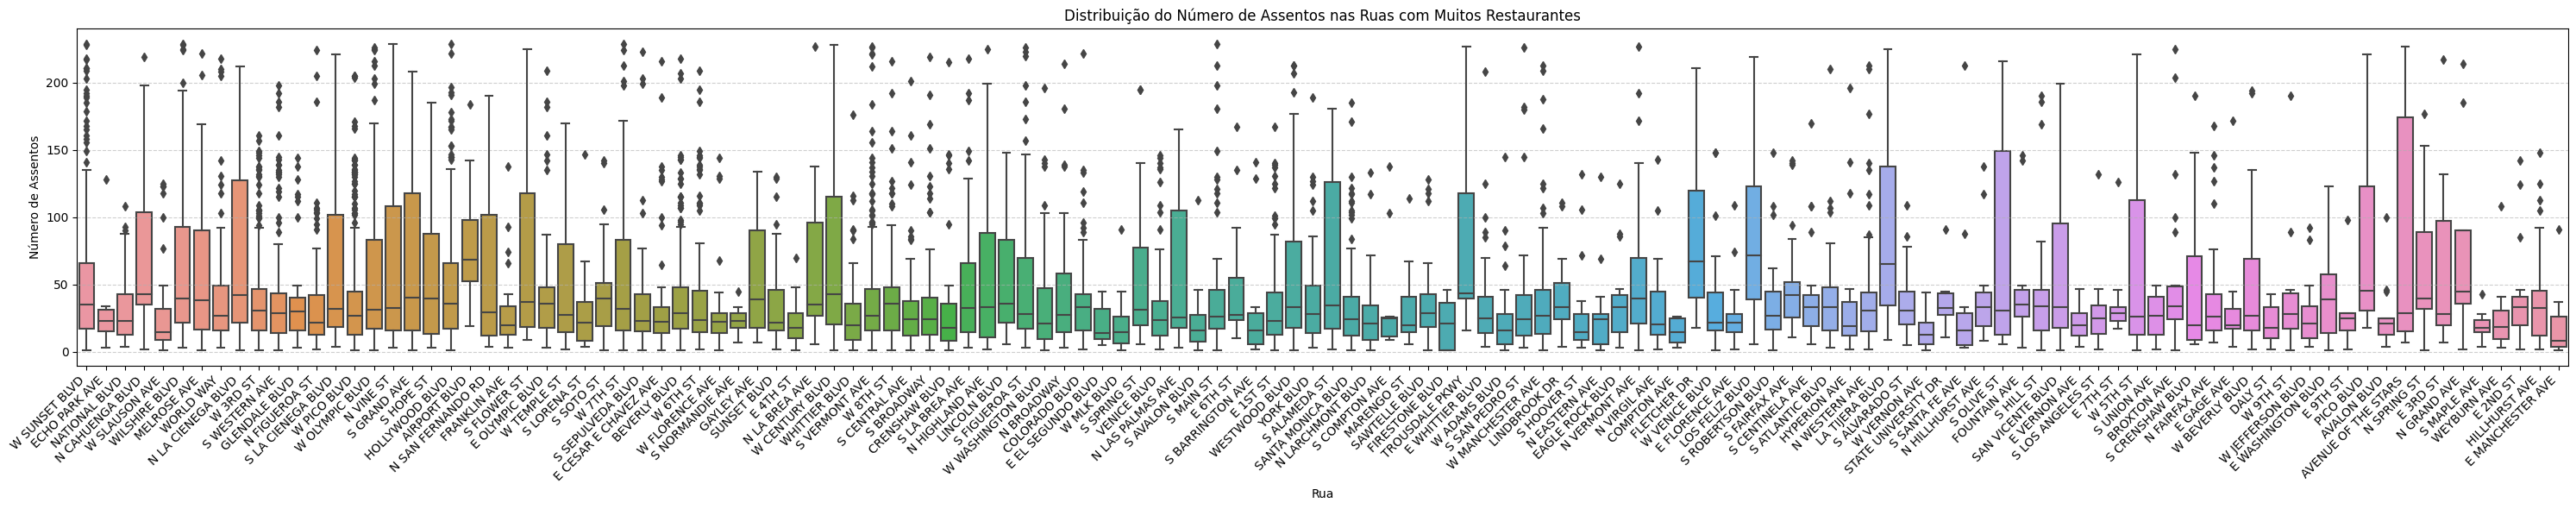

In [59]:

# Extrair nome da rua
def extract_street(address):
    if pd.isnull(address):
        return None
    match = re.match(r'\d+\s+(.*)', address)
    return match.group(1) if match else address

df['street'] = df['address'].apply(extract_street)

# Garantir que 'number' é numérico e limpar dados ausentes
df['number'] = pd.to_numeric(df['number'], errors='coerce')
df = df.dropna(subset=['number'])

# Selecionar ruas com mais de N restaurantes (ex: 10 ou mais)
top_streets = df['street'].value_counts()
busy_streets = top_streets[top_streets >= 10].index

# Filtrar o DataFrame
df_busy = df[df['street'].isin(busy_streets)]

# Plotar distribuição dos assentos
plt.figure(figsize=(30, 6))
sns.boxplot(data=df_busy, x='street', y='number')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição do Número de Assentos nas Ruas com Muitos Restaurantes')
plt.xlabel('Rua')
plt.ylabel('Número de Assentos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#  Conclusões Gerais

- Restaurantes de rede tendem a ser menores e mais padronizados
A média de assentos em estabelecimentos de rede é menor do que em estabelecimentos independentes.
Isso indica que redes priorizam unidades compactas, com alto giro de clientes e menor custo fixo por local.

- Alguns tipos de restaurante são mais comuns em redes
Tipos como cafés, lanchonetes ou fast food costumam ter maior presença em redes.
Restaurantes à la carte ou com serviço completo tendem a ser independentes e maiores.

- Ruas com muitos restaurantes mostram variedade, mas com tendência a tamanhos médios
A distribuição do número de assentos nessas ruas mostra uma grande variação, mas com a maioria dos restaurantes concentrados em faixas de 30 a 60 assentos.
Isso sugere um equilíbrio entre capacidade operacional e limitações físicas dos imóveis comerciais.

- A maioria das ruas tem apenas um restaurante cadastrado
Indica dispersão geográfica significativa: existem muitos pontos com baixa concorrência direta local, o que pode representar oportunidade.


# Recomendações Estratégicas
- Tipo ideal de restaurante para iniciar ou expandir uma rede:
Cafés, padarias modernas, lanches rápidos ou bistrôs compactos.
Foco em conceito padronizável, com estrutura leve (poucos assentos, atendimento rápido).

- Número de assentos recomendado para novas unidades:
Entre 30 e 50 assentos, o que equilibra:
Rendimento operacional por metro quadrado
Tempo de ocupação das mesas
Investimento inicial e custos fixos

- Possibilidade de desenvolver uma rede: altamente viável
A presença de outras redes mostra validação de mercado.
Muitos bairros têm pouca concentração, o que abre espaço para expansão.
Começar com prototipagem em ruas com alta densidade pode facilitar o aprendizado e o ganho de escala.

Presentation: https://drive.google.com/file/d/1xPMSFp0PS43WDd9gbbDwUvgOHcJwdUph/view?usp=drive_link